<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-2-30-4-30/blob/main/Multi_class_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification

In [40]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Target feature: Price range
    0   cheap
    1   Good price
    2   Expensive

## perform basic data quality checks

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [42]:
df.shape

(2000, 21)

In [43]:
#check for missing data
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [44]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated data present in this dataset

## Separate X and Y features

In [45]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
X = df.drop(columns=["price_range"])
Y = df[["price_range"]]

In [47]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [48]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [49]:
X.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


## Data Preprocessing and Data cleaning

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [51]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")

In [52]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [53]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Perform train test split

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=42)

In [55]:
xtrain.shape

(1600, 20)

In [56]:
xtest.shape

(400, 20)

## Preprocess Y data

In [57]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [58]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [59]:
ytrain_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Model building using Keras

In [60]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [61]:
ytrain_cat.shape

(1600, 4)

In [62]:
# Initialize the model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer(hidden layer)
model.add(Dense(units=64,activation="relu"))

# Add the Dropout layer
model.add(Dropout(rate=0.3))

# Add the Dense layer(hidden layer)
model.add(Dense(units=32,activation="relu"))

# Add the Dropout layer
model.add(Dropout(rate=0.15))

# Add the Dense layer(hidden layer)
model.add(Dense(units=ytrain_cat.shape[1],activation="softmax"))

In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [66]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [67]:
hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3062 - loss: 1.4302 - val_accuracy: 0.4469 - val_loss: 1.2519
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4668 - loss: 1.2002 - val_accuracy: 0.5531 - val_loss: 1.1090
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5212 - loss: 1.0688 - val_accuracy: 0.6062 - val_loss: 0.9473
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5665 - loss: 0.9607 - val_accuracy: 0.6656 - val_loss: 0.8039
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6206 - loss: 0.8344 - val_accuracy: 0.7156 - val_loss: 0.6970
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 0.7499 - val_accuracy: 0.7750 - val_loss: 0.6111
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.6452 - val_accuracy: 0.8188 - val_loss: 0.5392
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7610 - loss: 0.6036 - val_accuracy: 0.8313 - v

## Learning curve

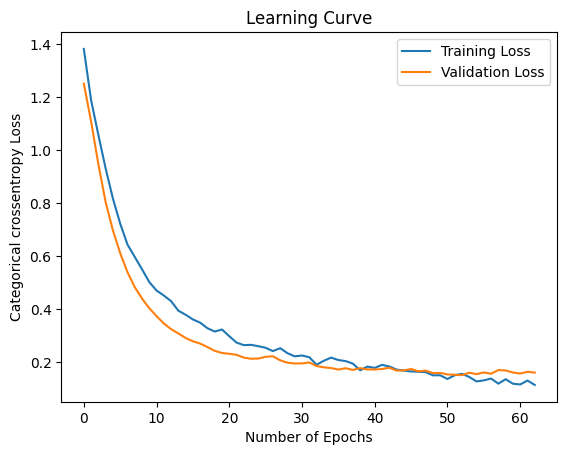

In [68]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Evaluate the model

In [69]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0378


[0.05799589678645134, 0.9837499856948853]

In [70]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9213 - loss: 0.1547  


[0.16850954294204712, 0.9200000166893005]

## Predictions

In [71]:
ypred_test = model.predict(xtest)
ypred_test[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[9.9213129e-01, 7.8686541e-03, 1.6322990e-10, 9.7087587e-25],
       [6.2207097e-13, 4.9284557e-03, 9.9504393e-01, 2.7482387e-05],
       [1.6495718e-02, 9.8333174e-01, 1.7251393e-04, 2.2658384e-14],
       [8.9304791e-35, 1.8354946e-14, 9.1463892e-04, 9.9908531e-01],
       [8.1072614e-04, 9.9512827e-01, 4.0608393e-03, 3.7409951e-09]],
      dtype=float32)

In [72]:
import numpy as np
np.max(ypred_test,axis=1)

array([0.9921313 , 0.99504393, 0.98333174, 0.9990853 , 0.9951283 ,
       0.9868072 , 0.5332598 , 0.9962758 , 0.8483273 , 0.93688464,
       0.9747466 , 0.8137578 , 0.96795046, 0.9999152 , 0.570653  ,
       0.6512583 , 0.99864954, 0.99989885, 0.9974174 , 0.9977749 ,
       0.9981419 , 0.7431299 , 0.78260213, 0.99192953, 0.9979074 ,
       0.9787104 , 0.961711  , 0.8689638 , 0.98458105, 0.99981904,
       0.9806378 , 0.9999104 , 0.99963266, 0.98894745, 0.9651258 ,
       0.9977284 , 0.9504956 , 0.98714846, 0.9997028 , 0.9712097 ,
       0.77019036, 0.73749536, 0.9815426 , 0.99970675, 0.6257685 ,
       0.9231297 , 0.78536266, 0.8894986 , 0.99811286, 0.98165447,
       0.9999792 , 0.99782604, 0.9990771 , 0.998337  , 0.84305036,
       0.946115  , 0.9821108 , 0.9662898 , 0.9999363 , 0.9997159 ,
       0.90124834, 0.9999046 , 0.9943408 , 0.98602116, 0.9976732 ,
       0.9845144 , 0.99989134, 0.9997678 , 0.9987523 , 0.96163106,
       0.97049004, 0.81690526, 0.9997345 , 0.96704674, 0.99463

In [74]:
ypred_test_final = np.argmax(ypred_test,axis=1)
ypred_test_final

array([0, 2, 1, 3, 1, 1, 1, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 1, 2, 3, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 1, 0, 0, 3, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [76]:
ypred_test_final[:5]

array([0, 2, 1, 3, 1])

In [75]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


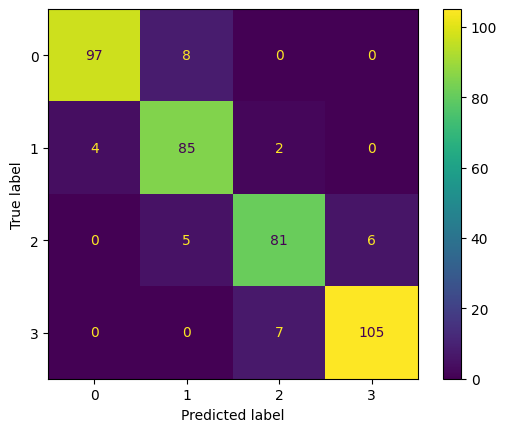

In [78]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_test_final)
ConfusionMatrixDisplay(cf).plot()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test_final))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       105
           1       0.87      0.93      0.90        91
           2       0.90      0.88      0.89        92
           3       0.95      0.94      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



## Save the model for final out of sample predictions

In [81]:
model.save("Mobile predictions.keras")

In [82]:
from keras.models import load_model

In [83]:
m1 = load_model('/content/Mobile predictions.keras')
m1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [84]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [85]:
xnew = xnew.drop(columns=["id"])
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [86]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,1.010051,0.463042,-1.019184,-0.992890,0.957886,1.210147,-0.006069,0.840642,1.084046,1.168355,-0.002497,-0.783435,-0.002963,0.402047,0.512708,0.730240,0.559641,0.994018,-1.014099
996,-1.432976,-0.990050,0.340463,0.981177,-0.992890,-1.043966,-1.049904,1.381165,1.292737,-0.227564,-1.305750,1.142498,0.880565,-0.176321,-1.022389,-1.094526,1.462493,-1.786861,0.994018,0.986097
997,-0.121824,-0.990050,-0.149853,-1.019184,-0.762495,0.957886,-1.325520,-0.006069,-1.702391,-1.539175,0.343653,-0.378903,-0.987096,-0.831024,-1.734608,-1.324131,0.547176,0.559641,-1.006018,-1.014099
998,0.670330,1.010051,-1.253064,0.981177,-0.992890,-1.043966,0.989655,-0.352878,0.868898,-1.101971,0.343653,-1.368378,-0.970895,0.354819,0.639453,1.201522,-0.917331,-1.786861,0.994018,-1.014099


In [87]:
final_preds = m1.predict(xnew_pre)
final_preds[:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.6506390e-21, 5.4597489e-08, 4.4772530e-01, 5.5227464e-01],
       [3.9831237e-30, 1.0192135e-11, 1.0184749e-02, 9.8981512e-01],
       [3.1101952e-20, 1.3340571e-06, 9.5063043e-01, 4.9368266e-02],
       [1.0079584e-37, 4.1267246e-15, 1.6812372e-04, 9.9983191e-01],
       [3.1661207e-04, 9.9534023e-01, 4.3431511e-03, 4.8728843e-10],
       [1.3254719e-27, 1.4533064e-10, 3.6147818e-02, 9.6385217e-01],
       [0.0000000e+00, 3.5425618e-19, 5.9833296e-06, 9.9999398e-01],
       [1.8399227e-05, 9.9113989e-01, 8.8416748e-03, 1.0319318e-09],
       [1.7494903e-26, 1.4288332e-10, 8.4062656e-03, 9.9159372e-01],
       [9.9896479e-01, 1.0352624e-03, 2.7572126e-13, 1.1755822e-31]],
      dtype=float32)

In [88]:
final_price = np.argmax(final_preds,axis=1)
final_price[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

## Save the predictions to dataframe and then save the results

In [89]:
xnew["Price Range"] = final_price
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [90]:
xnew.to_csv("PriceRange Results.csv")